# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/amansyayf/ml-course/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2023-10-30 14:26:34--  https://raw.githubusercontent.com/amansyayf/ml-course/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.04s   

2023-10-30 14:26:35 (1.37 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
seed = 11
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = pd.DataFrame(dataset[:, 1:-1].astype(int))
target = pd.DataFrame(dataset[:, -1])

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=seed )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846, 1)
(549, 18) (549, 1) (297, 18) (297, 1)


In [4]:
import warnings
warnings.filterwarnings('ignore')

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:

X_train.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
205,87,47,81,149,62,9,147,45,19,152,171,325,181,72,0,6,188,198
786,107,55,103,213,68,11,219,30,25,172,221,709,216,70,10,7,187,197
689,105,51,105,197,60,11,191,35,22,162,207,545,194,64,18,4,196,205
823,105,54,105,213,67,10,200,33,23,163,214,597,214,68,10,20,190,198
634,81,38,53,123,58,6,134,51,18,128,147,259,148,83,10,6,177,184
61,77,38,63,135,59,5,130,52,18,130,145,247,139,79,13,21,183,187
316,91,41,66,131,56,9,126,53,18,144,159,237,155,72,3,10,191,194
181,78,36,60,116,56,6,123,55,17,124,141,221,121,78,3,16,178,185
591,80,36,69,127,56,7,128,53,18,124,147,240,133,70,2,21,183,191
83,79,40,80,133,55,7,147,47,19,135,172,311,144,76,8,30,181,193


Methods `describe` and `info` deliver some useful information.

In [6]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.697632,45.036430,82.078324,169.147541,61.750455,8.597450,169.114754,40.850638,20.602914,148.428051,188.879781,441.196721,175.533698,72.519126,6.555556,12.304189,188.876138,195.613843
std,8.266965,6.147706,15.613701,33.538926,7.940795,4.577802,33.218085,7.758649,2.587673,14.495557,31.326398,176.868857,32.306432,7.592141,4.990786,8.744362,6.232651,7.484794
min,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,319.000000,151.000000,67.000000,3.000000,5.000000,184.000000,191.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,587.000000,197.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 205 to 703
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
dtypes: int64(18)
memory usage: 81.5 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

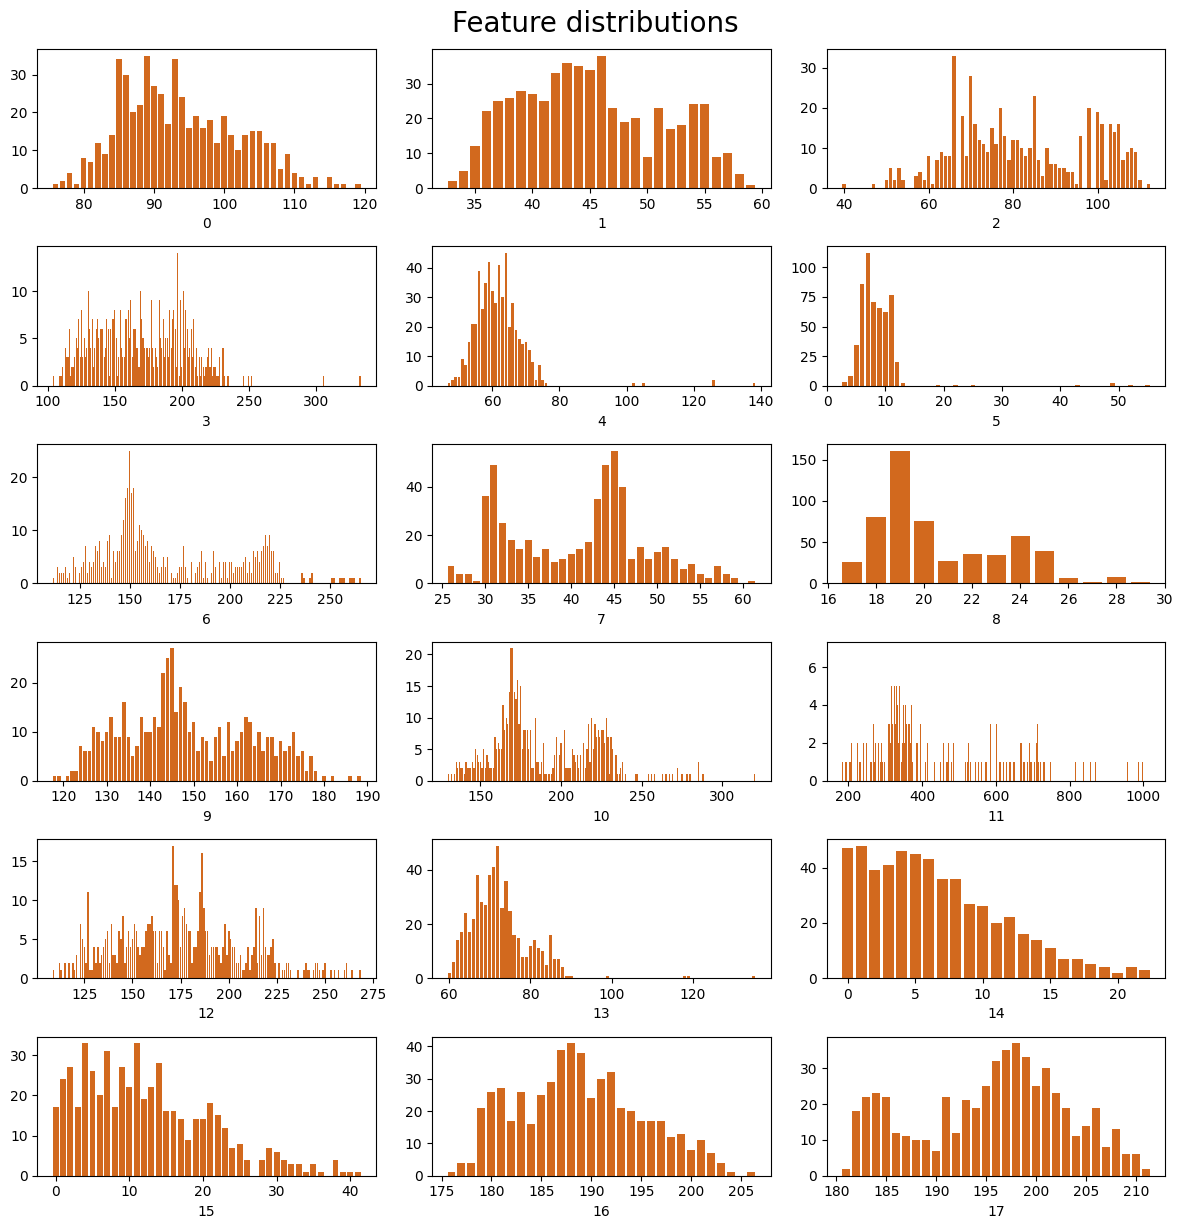

In [8]:
_, axs = plt.subplots(6, 3, figsize=(12, 12))
for col, ax in zip(X_test.columns, axs.ravel()):
    if X_train[col].dtype == float:
        ax.hist(X_train[col], bins=100, color='chocolate')
    else: #int
        vc = X_train[col].value_counts()
        ax.bar(vc.index, vc, color='chocolate')
    ax.set_xlabel(col)
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=20)
plt.show()

##### Note
some features are needed to be log-transformed

In [9]:
transformed_cols = [4, 5, 8, 13]
X_train[transformed_cols] = X_train[transformed_cols].apply(np.log1p)
X_test[transformed_cols] = X_test[transformed_cols].apply(np.log1p)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [11]:
seed = 11
lg = LogisticRegression(random_state=seed, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param = {'penalty': ['l1', 'l2', 'elasticnet', None],'C':np.arange(0.01, 0.2, 0.05)}
grid = GridSearchCV(lg, param, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=11, solver='saga',
                                          tol=0.001),
             param_grid={'C': array([0.01, 0.06, 0.11, 0.16]),
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [12]:
grid.best_estimator_

LogisticRegression(C=0.01, max_iter=500, multi_class='multinomial',
                   random_state=11, solver='saga', tol=0.001)

In [13]:
from sklearn.metrics import f1_score, accuracy_score


In [14]:
lg = LogisticRegression(C=0.01, max_iter=500,
                   multi_class='multinomial', random_state=11, penalty = None,
                   solver='saga', tol=0.001)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))
print(accuracy_score(y_test, y_pred))

0.7013419730263664
0.7070707070707071


In [15]:
y_train_pred = lg.predict(X_train)
print(f1_score(y_train, y_train_pred, average='macro'))
print(accuracy_score(y_train, y_train_pred))

0.7132196936963426
0.7231329690346083


In [16]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

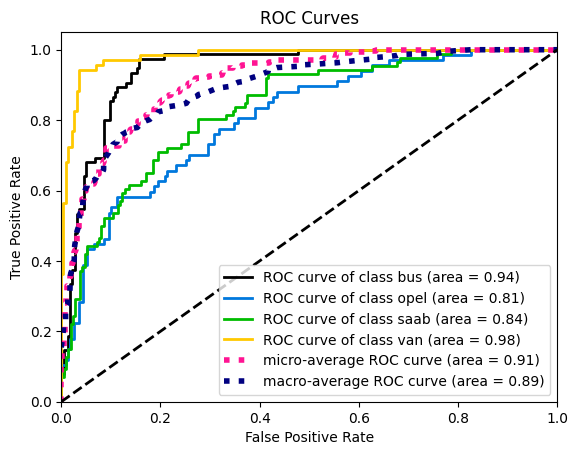

In [17]:
import scikitplot as skplt
y_prob = lg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob)


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

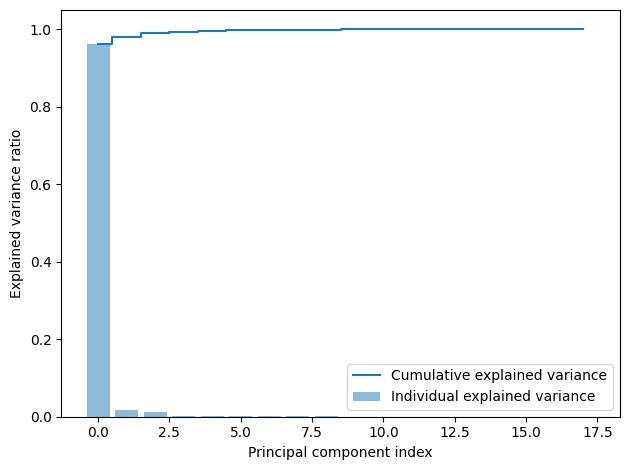

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA()

principalComponents = pca.fit_transform(X_train)


exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA(n_components=2))])
sc = StandardScaler()
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

In [20]:
X_train_pr = np.hstack((sc.fit_transform(X_train), pipe.fit_transform(X_train)))
X_test_pr = np.hstack((sc.transform(X_test), pipe.transform(X_test)))

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [21]:
seed = 11
lg_pr = LogisticRegression(random_state=seed, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param = {'C':np.arange(0.01, 0.3, 0.05)}
grid_pr = GridSearchCV(lg_pr, param, cv=5)
grid_pr.fit(X_train_pr, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=11, solver='saga',
                                          tol=0.001),
             param_grid={'C': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26])})

In [22]:
grid_pr.best_estimator_

LogisticRegression(C=0.26, max_iter=500, multi_class='multinomial',
                   random_state=11, solver='saga', tol=0.001)

In [23]:
lg = LogisticRegression(C=0.26, max_iter=500,
                   multi_class='multinomial', random_state=11,
                   solver='saga', tol=0.001)
lg.fit(X_train_pr, y_train)
y_pred = lg.predict(X_test_pr)
print(f1_score(y_test, y_pred, average='macro'))
print(accuracy_score(y_test, y_pred))

0.7689059399031151
0.7710437710437711


In [24]:
y_train_pred = lg.predict(X_train_pr)
print(f1_score(y_train, y_train_pred, average='macro'))
print(accuracy_score(y_train, y_train_pred))

0.7860287679241981
0.7905282331511839


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [25]:

from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(random_state=seed)
param = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': range(1, 100, 5)}
grid = GridSearchCV(dt, param, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 100, 5)})

In [26]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=11)

In [27]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=16, random_state=11)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))
print(accuracy_score(y_test, y_pred))

0.676675569186646
0.6734006734006734


In [28]:
dt1= DecisionTreeClassifier(random_state=seed)
param = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': range(1, 100, 5)}
grid = GridSearchCV(dt1, param, cv=5)
grid.fit(X_train_pr, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 100, 5)})

In [29]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=11)

In [30]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=11)
dt.fit(X_train_pr, y_train)
y_pred = dt.predict(X_test_pr)
print(f1_score(y_test, y_pred, average='macro'))
print(accuracy_score(y_test, y_pred))

0.7169052744258693
0.7138047138047138


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [31]:
from sklearn.ensemble import BaggingClassifier

In [32]:
estimator_range = range(2, 100, 5)


scores1_tr = []
scores1_lg = []

scores2_tr = []
scores2_lg = []



for n_estimators in estimator_range:

    b_tr = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=seed),n_estimators = n_estimators, random_state = seed)
    b_lg = BaggingClassifier(estimator=LogisticRegression(random_state=seed), n_estimators=n_estimators, random_state=seed)

    b_tr.fit(X_train_pr, y_train)
    b_lg.fit(X_train_pr, y_train)


    scores1_tr.append(accuracy_score(y_true = y_test, y_pred = b_tr.predict(X_test_pr)))
    scores1_lg.append(accuracy_score(y_true = y_test, y_pred = b_lg.predict(X_test_pr)))
    scores2_tr.append(f1_score(y_test, y_pred = b_tr.predict(X_test_pr), average='macro'))
    scores2_lg.append(f1_score(y_test, y_pred = b_lg.predict(X_test_pr), average='macro'))

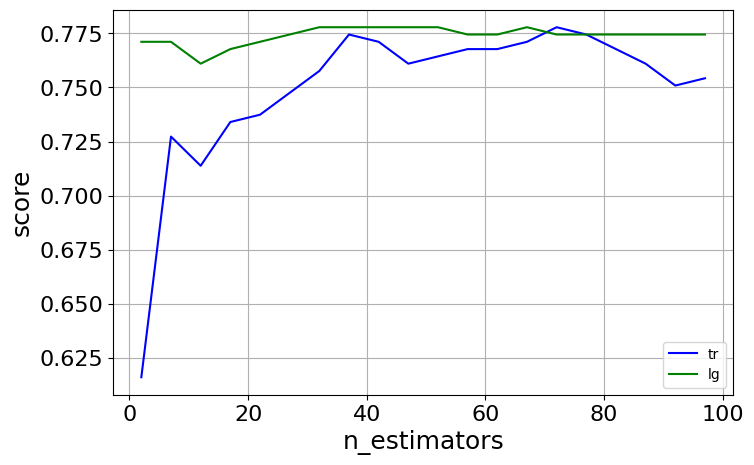

In [35]:
plt.figure(figsize=(8,5))
plt.plot(estimator_range, scores1_tr, c='b', label='tr')
plt.plot(estimator_range, scores1_lg, c='g', label='lg')

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

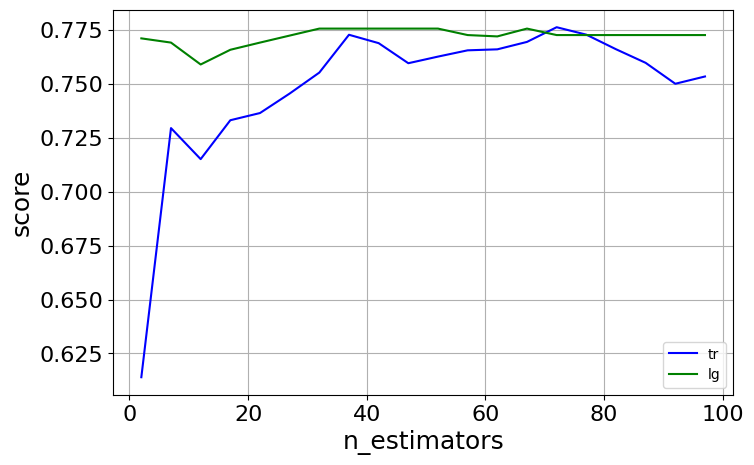

In [36]:
plt.figure(figsize=(8,5))
plt.plot(estimator_range, scores2_tr, c='b', label='tr')
plt.plot(estimator_range, scores2_lg, c='g', label='lg')

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [40]:
print(scores1_tr[14])

0.7777777777777778


In [42]:
print(scores1_lg[6])

0.7777777777777778


###### **Note**
From looking at the plots of scores it's seems that parametrs of n_estimators more affects on bagging of trees than bagging of logregs.

Optimal numbers n_estimators are 72, 32 for trees and logregs respectively.

Hyperparameters can be used in ensemble, because every model acts like its independent and condition for which hyperparameters was chosen are the same.


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [44]:
from sklearn.ensemble import RandomForestClassifier
scores = []
num_trees = range(2, 100, 5)
for num in num_trees:
  rf = RandomForestClassifier(random_state=seed, n_estimators=num)
  rf.fit(X_train_pr, y_train)


  scores.append(accuracy_score(y_true = y_test, y_pred = rf.predict(X_test_pr)))

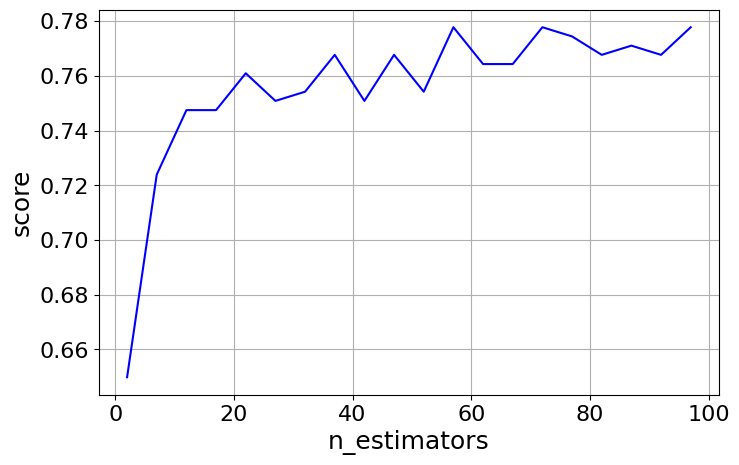

In [45]:
plt.figure(figsize=(8,5))
plt.plot(num_trees, scores, c='b')


plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.grid(True)
plt.show()

In [47]:
scores[14]

0.7777777777777778

##### **Note**
Optimal number of trees is 72 what fits to number in bagging of trees. It's like magic!

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [48]:
X_train_pr = pd.DataFrame(np.hstack((sc.fit_transform(X_train), pipe.fit_transform(X_train))))
X_test_pr = pd.DataFrame(np.hstack((sc.transform(X_test), pipe.transform(X_test))))

In [52]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X_train_pr)

scores1_lg = []
scores1_dt = []
scores1_rf = []
scores2_lg = []
scores2_dt = []
scores2_rf = []

tr_indx  = []
for _, indx  in kf.split(X_train_pr, y_train):
  tr_indx = np.hstack((tr_indx, indx))
  tr_indx = tr_indx.astype(int)
  lg = LogisticRegression(C=0.26, max_iter=500, multi_class='multinomial', random_state=seed, solver='saga', tol=0.001)
  dt = DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=seed)
  rf = RandomForestClassifier(random_state=seed, n_estimators=75)

  lg.fit(X_train_pr.iloc[tr_indx], y_train.iloc[tr_indx])
  dt.fit(X_train_pr.iloc[tr_indx], y_train.iloc[tr_indx])
  rf.fit(X_train_pr.iloc[tr_indx], y_train.iloc[tr_indx])

  scores1_lg.append(accuracy_score(y_test, lg.predict(X_test_pr)))
  scores1_dt.append(accuracy_score(y_test, dt.predict(X_test_pr)))
  scores1_rf.append(accuracy_score(y_test, rf.predict(X_test_pr)))

  scores2_lg.append(f1_score(y_test, lg.predict(X_test_pr), average='macro'))
  scores2_dt.append(f1_score(y_test, dt.predict(X_test_pr), average='macro'))
  scores2_rf.append(f1_score(y_test, rf.predict(X_test_pr), average='macro'))


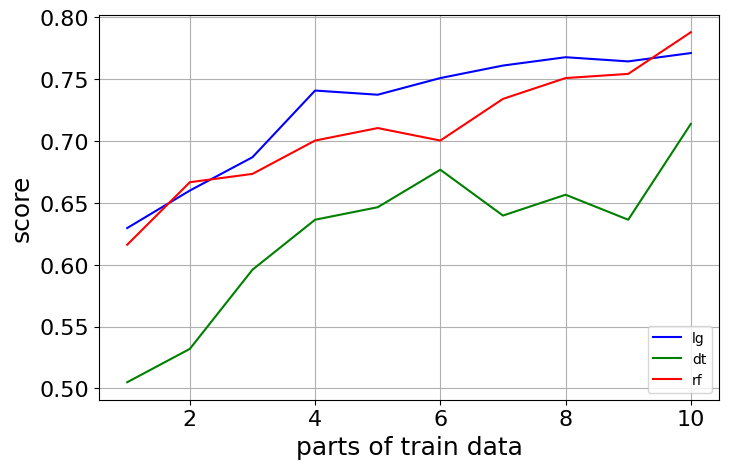

In [53]:
plt.figure(figsize=(8,5))
x = range(1, 11, 1)
plt.plot(x, scores1_lg, c='b', label='lg')
plt.plot(x, scores1_dt, c='g', label='dt')
plt.plot(x, scores1_rf, c='r', label='rf')


# Adjust labels and font (to make visable)
plt.xlabel("parts of train data", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

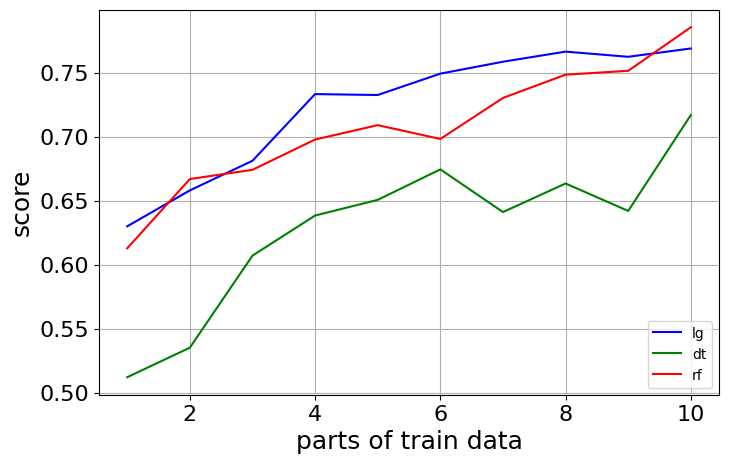

In [54]:
plt.figure(figsize=(8,5))
x = range(1, 11, 1)
plt.plot(x, scores2_lg, c='b', label='lg')
plt.plot(x, scores2_dt, c='g', label='dt')
plt.plot(x, scores2_rf, c='r', label='rf')


# Adjust labels and font (to make visable)
plt.xlabel("parts of train data", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

##### **Note**
It can be seen that in general the more training data model has the better scores it gives. Using such plots we can predict what score we would get if we trained models on whole dataset

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package. Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods. Please, explain your answer.

In [56]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.8 MB/s eta 0:00:00


In [59]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm
import optuna
from optuna.samplers import TPESampler
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
    make_column_transformer,
)

In [77]:
def objective(trial, X_train, y_train, X_test, y_test):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000, step=5),
        }
    model = lgbm.LGBMClassifier(objective="multiclass", **param_grid, random_state = seed, verbose=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    auc = accuracy_score(y_test, preds)
    return auc

In [78]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train_pr, y_train, X_test_pr, y_test)
study.optimize(func, n_trials=20)

[I 2023-10-30 15:34:55,506] A new study created in memory with name: LGBM Classifier
[I 2023-10-30 15:34:56,456] Trial 0 finished with value: 0.7575757575757576 and parameters: {'n_estimators': 795}. Best is trial 0 with value: 0.7575757575757576.
[I 2023-10-30 15:34:57,057] Trial 1 finished with value: 0.7542087542087542 and parameters: {'n_estimators': 245}. Best is trial 0 with value: 0.7575757575757576.
[I 2023-10-30 15:34:57,743] Trial 2 finished with value: 0.7575757575757576 and parameters: {'n_estimators': 345}. Best is trial 0 with value: 0.7575757575757576.
[I 2023-10-30 15:34:58,545] Trial 3 finished with value: 0.7542087542087542 and parameters: {'n_estimators': 530}. Best is trial 0 with value: 0.7575757575757576.
[I 2023-10-30 15:34:59,483] Trial 4 finished with value: 0.7542087542087542 and parameters: {'n_estimators': 770}. Best is trial 0 with value: 0.7575757575757576.
[I 2023-10-30 15:34:59,625] Trial 5 finished with value: 0.7407407407407407 and parameters: {'n_esti

In [79]:
study.best_params

{'n_estimators': 795}

In [80]:
study.best_value

0.7575757575757576

##### **Note**
Here we used Optuna search for finding best n_estimators number